In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, col, avg
from pyspark.sql.types import DoubleType
spark = SparkSession.builder.getOrCreate()

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np

In [3]:
# Load the three CSV files into separate data frames
data1 = spark.read.format("csv").option("header", "true").load("C:/Users/S542208/Documents/Dev App/BigDataFinal/Raw Data/IMDB Top 250 Movies.csv")
data2 = spark.read.format("csv").option("header", "true").load("C:/Users/S542208/Documents/Dev App/BigDataFinal/Raw Data/movies_initial.csv")
data3 = spark.read.format("csv").option("header", "true").load("C:/Users/S542208/Documents/Dev App/BigDataFinal/Raw Data/movies.csv")

In [4]:
# Join the three data frames on the year column
joined_data = data1.join(data2, ["year"]).join(data3, ["year"])


In [5]:

# Select the required columns and filter the rows where imdbRating is not double
selected_data = joined_data.select("year", "rating", "score", col("imdbRating").cast(DoubleType())).filter(col("imdbRating").isNotNull())

# Filter the rows for years older than 2000
filtered_data = selected_data.filter(col("year") < 2000)
# Group the data by year, rating, and score, and aggregate the count of ratings
grouped_data = filtered_data.groupBy("year", "rating", "score", "imdbRating").agg(count("*").alias("count"))


In [6]:
# Sort the data by year and rating
sorted_data = grouped_data.orderBy("year", "rating")

sorted_data.show()

+----+------+-----+----------+-----+
|year|rating|score|imdbRating|count|
+----+------+-----+----------+-----+
|1980|   8.2|  6.2|       7.9|   20|
|1980|   8.2|  6.3|       5.9|  100|
|1980|   8.2|  7.4|       6.2|   24|
|1980|   8.2|  8.2|       8.7|    6|
|1980|   8.2|  7.1|       4.4|   30|
|1980|   8.2|  8.7|       8.0|   10|
|1980|   8.2|  5.4|       8.8|    4|
|1980|   8.2|  6.5|       7.8|   32|
|1980|   8.2|  8.2|       3.2|    2|
|1980|   8.2|  4.6|       7.8|   16|
|1980|   8.2|  5.3|       3.9|   30|
|1980|   8.2|  5.1|       4.4|   30|
|1980|   8.2|  4.7|       6.4|   22|
|1980|   8.2|  6.1|       3.6|    8|
|1980|   8.2|  7.4|       3.1|    4|
|1980|   8.2|  4.8|       4.1|    4|
|1980|   8.2|  6.3|       7.7|   10|
|1980|   8.2|  5.5|       4.6|   18|
|1980|   8.2|  5.4|       6.8|   48|
|1980|   8.2|  6.8|       8.0|   60|
+----+------+-----+----------+-----+
only showing top 20 rows



In [7]:
# Group the data by year and aggregate the average rating, score, and imdbRating
grouped_data1 = filtered_data.groupBy("year").agg(avg("rating"), avg("score"), avg("imdbRating"))

# Convert the grouped data to a Pandas DataFrame
pandas_data = grouped_data1.toPandas()

# Set the year column as the index
pandas_data.set_index("year", inplace=True)

In [8]:
## Graph based on average rating of imdRating. Showcases if the released year for particular dataset affects the overall ratings of the movie.

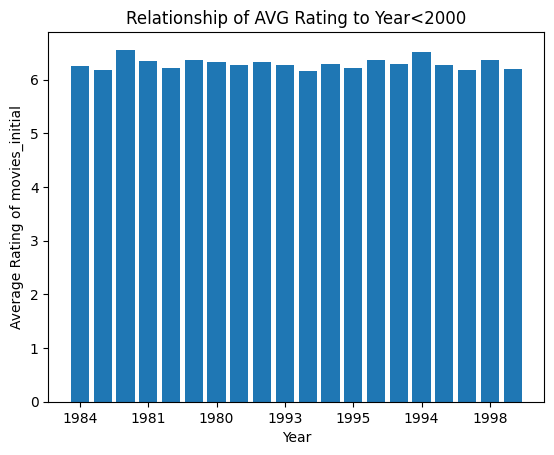

In [9]:
# Plot the bar graph using matplotlib
fig, ax = plt.subplots()
plt.title("Relationship of AVG Rating to Year<2000")
ax.bar(pandas_data.index, pandas_data["avg(imdbRating)"])
ax.set_xlabel("Year")
ax.set_ylabel("Average Rating of movies_initial")
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

In [10]:
## FIltering the data to get the average of all three ratings from all three datasets

In [11]:
filtered_data = filtered_data.withColumn("rating", col("rating").cast(DoubleType()))

# Cast the "score" column to a numerical type
filtered_data = filtered_data.withColumn("score", col("score").cast(DoubleType()))

# Cast the "imdbRating" column to a numerical type
filtered_data = filtered_data.withColumn("imdbRating", col("imdbRating").cast(DoubleType()))

# Group the data by year and aggregate the average of rating, score, and imdbRating
grouped_data2 = filtered_data.groupBy("year").agg({"rating": "avg", "score": "avg", "imdbRating": "avg"})

# Convert the grouped data to a Pandas DataFrame
pandas_data2 = grouped_data2.toPandas()

# Set the year column as the index
pandas_data2.set_index("year", inplace=True)

In [12]:
## Graph using the average of combined average of "rating" "score" and "imdbRating" in order to see the overall relationship of year and all the ratings

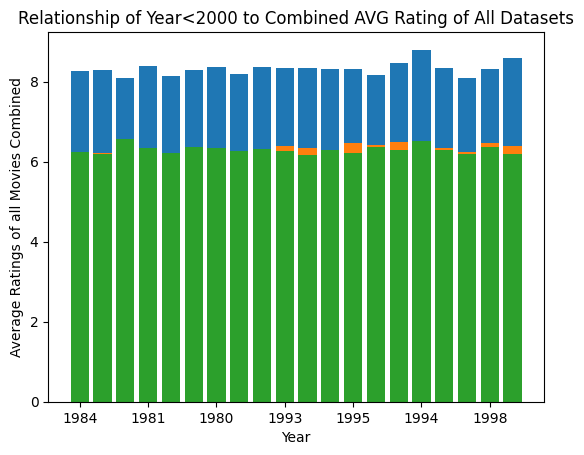

In [13]:
# Plot the bar graph using matplotlib
fig, ax = plt.subplots()
plt.title("Relationship of Year<2000 to Combined AVG Rating of All Datasets")
ax.bar(pandas_data2.index, pandas_data2["avg(rating)"])
ax.bar(pandas_data2.index, pandas_data2["avg(score)"])
ax.bar(pandas_data2.index, pandas_data2["avg(imdbRating)"])
ax.set_xlabel("Year")
ax.set_ylabel("Average Ratings of all Movies Combined")
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

In [14]:
## Same thing but for years after 2000

In [15]:
# Filter the rows for years greater than 2000
filtered_data1 = selected_data.filter(col("year") > 2000)
# Group the data by year, rating, and score, and aggregate the count of ratings
grouped_data_after2000 = filtered_data1.groupBy("year", "rating", "score", "imdbRating").agg(count("*").alias("count"))

In [16]:
# Group the data by year and aggregate the average rating, score, and imdbRating
grouped_data3 = filtered_data1.groupBy("year").agg(avg("rating"), avg("score"), avg("imdbRating"))

# Convert the grouped data to a Pandas DataFrame
pandas_data3 = grouped_data3.toPandas()

# Set the year column as the index
pandas_data3.set_index("year", inplace=True)

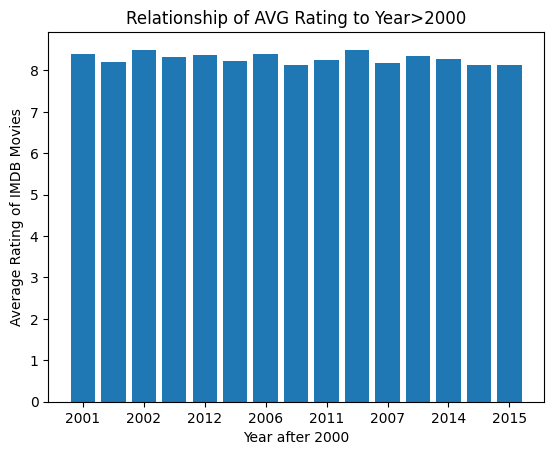

In [17]:
# Plot the bar graph using matplotlib
fig, ax = plt.subplots()
plt.title("Relationship of AVG Rating to Year>2000")
ax.bar(pandas_data3.index, pandas_data3["avg(rating)"])
ax.set_xlabel("Year after 2000")
ax.set_ylabel("Average Rating of IMDB Movies")
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

In [18]:
## How does the release date affect the gross generated?

In [19]:
## "Gross" comes from IMDB Top 250, "gross income" comes from movies,and"gross net comes" from moveis_initial

In [20]:
# Select the required columns and filter the rows where imdbRating is not double
gross_data = joined_data.select("year", "gross", "gross income", col("gross net").cast(DoubleType())).filter(col("gross net").isNotNull())

# Filter the rows for years greater than 2000
filter_data = gross_data.filter(col("year") > 2000)

# Group the data by year and aggregate the count of rows
grossFinal_data = filter_data.groupBy("year").agg(count("*").alias("count"))


In [21]:
# Group the data by year and aggregate the average rating, score, and imdbRating
new_data = filter_data.groupBy("year").agg(avg("gross"), avg("gross income"), avg("gross net"))

# Convert the grouped data to a Pandas DataFrame
pandas_data4 = new_data.toPandas()

# Set the year column as the index
pandas_data4.set_index("year", inplace=True)

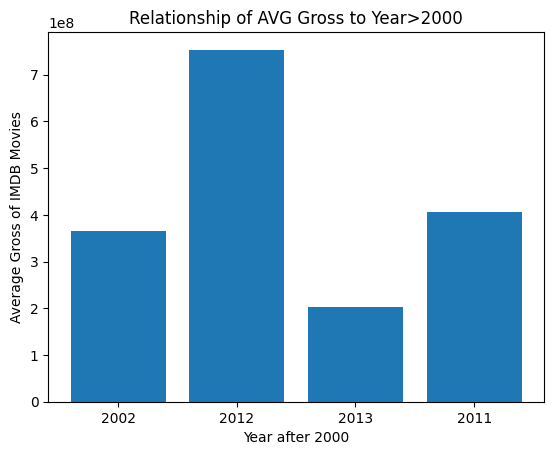

In [22]:
# Plot the bar graph using matplotlib
fig, ax = plt.subplots()
plt.title("Relationship of AVG Gross to Year>2000")
ax.bar(pandas_data4.index, pandas_data4["avg(gross)"])
ax.set_xlabel("Year after 2000")
ax.set_ylabel("Average Gross of IMDB Movies")
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()


In [23]:
# Sort the data by year and rating and display it
display_data = new_data.orderBy("year", "avg(gross)")

display_data.show()

+----+-------------------+--------------------+-----------------+
|year|         avg(gross)|   avg(gross income)|   avg(gross net)|
+----+-------------------+--------------------+-----------------+
|2002|3.662325466666667E8|        8.50171826E7|5.300000000000079|
|2011|       4.06364451E8|1.2481249666331658E8|7.600000000000134|
|2012|       7.53622099E8|     1.27380950975E8|             43.0|
|2013|     2.0343028275E8|      1.2997924337E8|            201.0|
+----+-------------------+--------------------+-----------------+



In [24]:
## This graph showcases the relationship of average gross of individual datas based on year > 2000

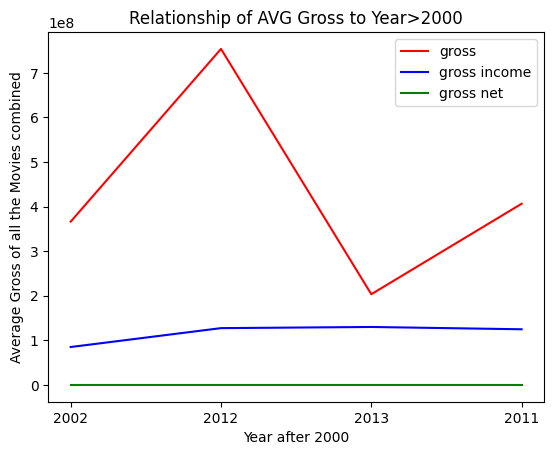

In [25]:
# Create a line graph
fig, ax = plt.subplots()
ax.plot(pandas_data4.index, pandas_data4["avg(gross)"], color="red", label="gross")
ax.plot(pandas_data4.index, pandas_data4["avg(gross income)"], color="blue", label="gross income")
ax.plot(pandas_data4.index, pandas_data4["avg(gross net)"], color="green", label="gross net")
plt.title("Relationship of AVG Gross to Year>2000")
ax.set_xlabel("Year after 2000")
ax.set_ylabel("Average Gross of all the Movies combined")
ax.legend()
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()


In [26]:
# Select the required columns and filter the rows where imdbRating is not double
average_data = joined_data.select("year", "gross", "gross income", col("gross net").cast(DoubleType())).filter(col("imdbRating").isNotNull())

# Filter the rows for years older than 2000
last_data = average_data.filter(col("year") < 2000)
# Group the data by year, rating, and score, and aggregate the count of ratings
averages_data = last_data.groupBy("year", "gross", "gross income", "gross net").agg(count("*").alias("count"))

In [27]:
# Group the data by year and aggregate the average rating, score, and imdbRating
grouped_datas = last_data.groupBy("year").agg(avg("gross"), avg("gross income"), avg("gross net"))

# Convert the grouped data to a Pandas DataFrame
final_datas = grouped_datas.toPandas()

# Set the year column as the index
final_datas.set_index("year", inplace=True)

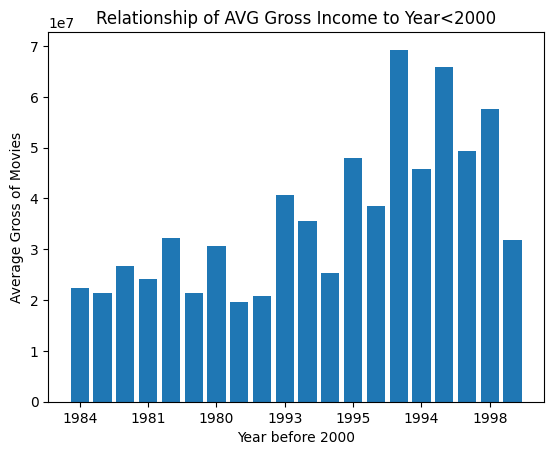

In [28]:
# Plot the bar graph using matplotlib
fig, ax = plt.subplots()
plt.title("Relationship of AVG Gross Income to Year<2000")
ax.bar(final_datas.index, final_datas["avg(gross income)"])
ax.set_xlabel("Year before 2000")
ax.set_ylabel("Average Gross of Movies")
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

In [29]:
## This graph showcases the relationship of average gross of individual datas based on year < 2000

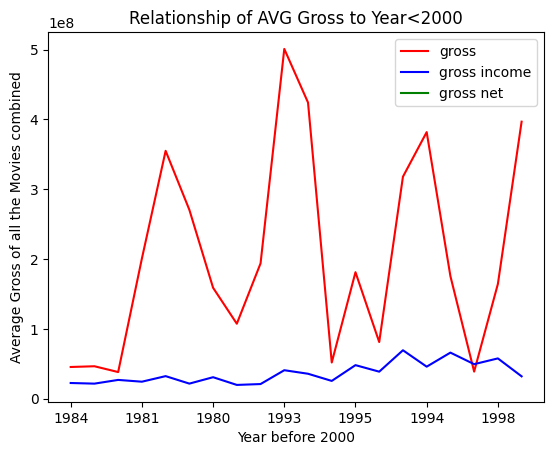

In [30]:
# Create a line graph
fig, ax = plt.subplots()
ax.plot(final_datas.index, final_datas["avg(gross)"], color="red", label="gross")
ax.plot(final_datas.index, final_datas["avg(gross income)"], color="blue", label="gross income")
ax.plot(final_datas.index, final_datas["avg(gross net)"], color="green", label="gross net")
plt.title("Relationship of AVG Gross to Year<2000")
ax.set_xlabel("Year before 2000")
ax.set_ylabel("Average Gross of all the Movies combined")
ax.legend()
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()